In [1]:

import numpy as np
from torch.utils.data import Dataset
import torchvision.transforms as transforms
import torchvision.transforms.functional as TF
from torch.utils.data import DataLoader
import glob 
from torch.utils.data import Subset
import torch
import torch.nn as nn
from torch import nn 
from image_alteration import image_alteration
from architecture import CNN
from PIL import Image
import pickle
from matplotlib import pyplot as plt
import random
from dataset import ImageData
from utils import train,evaluate
from visualize import visualize
import os

import cv2
import scipy.ndimage as ndimage

c:\ProgramData\Miniconda3\envs\pytorch\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: [WinError 127] The specified procedure could not be found
  warn(f"Failed to load image Python extension: {e}")


In [2]:
input_dir = 'training'
im_list = os.listdir('training')
im_list = list(map(lambda key: os.path.join(input_dir,key),im_list))
dataset = ImageData(im_list)
print('Dataset length: ', len(dataset))
print(im_list)

Dataset length:  21
['training\\000000.jpg', 'training\\000001.jpg', 'training\\000002.jpg', 'training\\000003.jpg', 'training\\000004.jpg', 'training\\000005.jpg', 'training\\000006.jpg', 'training\\000007.jpg', 'training\\000008.jpg', 'training\\000009.jpg', 'training\\000010.jpg', 'training\\000011.jpg', 'training\\000012.jpg', 'training\\000013.jpg', 'training\\000014.jpg', 'training\\000015.jpg', 'training\\000016.jpg', 'training\\000017.jpg', 'training\\000018.jpg', 'training\\000019.jpg', 'training\\000020.jpg']


In [3]:
rng = np.random.default_rng(seed=49)
n_samples = len(dataset)
shuffled_indices = rng.permutation(n_samples)
testset_inds = shuffled_indices[:int(n_samples / 5)]
trainingset_inds = shuffled_indices[int(n_samples / 5) :]


testset = Subset(dataset, indices=testset_inds)
trainingset = Subset(dataset, indices=trainingset_inds)
evalset = Subset(ImageData(im_list,original=True), indices=trainingset_inds)
print('Test set length', len(testset))
print('Training set length', len(trainingset))
i,k,t = trainingset[0]
print(i.shape,k.shape,t.shape)


Test set length 4
Training set length 17
torch.Size([3, 100, 100]) (3, 100, 100) (27888,)


In [4]:
test_loader = DataLoader(
    testset,  # we want to load our test dataset
    shuffle=False,  # do not shuffle test data
    batch_size=1  # 1 sample at a time
)

training_loader = DataLoader(
    trainingset,  # we want to load our training dataset
    shuffle=True,  # shuffle the training data
    batch_size=1  # stack 1 samples to a minibatch

)

print(f"testset ({len(testset)} samples)")
print(f"trainingset ({len(trainingset)} samples)")


testset (4 samples)
trainingset (17 samples)


In [5]:
model = CNN()
trained_model = train(model,training_loader,num_epochs = 5, lr = 0.001)

Epoch=1/5,   Loss=0.521339963464176
Epoch=2/5,   Loss=0.2845911751775181
Epoch=3/5,   Loss=0.2339556493303355
Epoch=4/5,   Loss=0.17941063423367107
Epoch=5/5,   Loss=0.11836832038619939


In [6]:
evaluate(model,test_loader)

Evaluation Loss= 0.08312585856765509


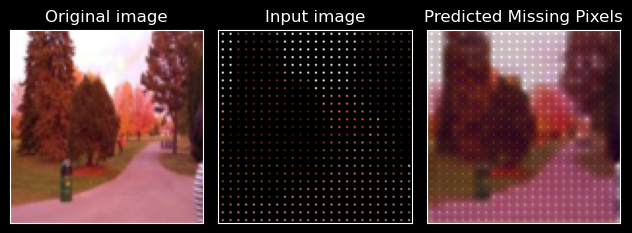

In [16]:
# View results
loaded_model = CNN()
loaded_model.load_state_dict(torch.load('final_model.pth'))
image = evalset[0]
visualize(loaded_model,image)
